In [1]:
data_file = open("gdrive/My Drive/DL_study/3_week/mnist_train.csv", "r") 
training_data = data_file.readlines()
data_file.close()

test_data_file = open("gdrive/My Drive/DL_study/3_week/mnist_test.csv", "r")
test_data = test_data_file.readlines()
test_data_file.close()

In [3]:
print("num train data : {}".format(len(training_data)))
print("num test data : {}".format(len(test_data)))

num train data : 60000
num test data : 10000


(785,)


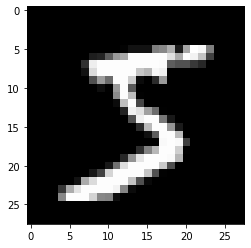

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t = np.asfarray(training_data[0].split(","))
print(t.shape)
n = t[1:].reshape(28,28)

plt.imshow(n, cmap='gray')
plt.show()

In [5]:
asd = np.array([1,2,3,4], ndmin=2)
print(asd)

[[1 2 3 4]]


In [6]:
class DeepNeuralNetwork:
    def __init__(self, input_layers, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layers):
        self.inputs = input_layers
        self.hidden_1 = hidden_layer_1
        self.hidden_2 = hidden_layer_2
        self.hidden_3 = hidden_layer_3
        self.outputs = output_layers
        self.test_data = None

        #weight initialized by normal distribution
        self.w_ih = np.random.randn(self.inputs, self.hidden_1) / np.sqrt(self.inputs/2)
        self.w_hh_12 = np.random.randn(self.hidden_1, self.hidden_2) / np.sqrt(self.hidden_1/2)
        self.w_hh_23 = np.random.randn(self.hidden_2, self.hidden_3) / np.sqrt(self.hidden_2/2)
        self.w_ho = np.random.randn(self.hidden_3, self.outputs) / np.sqrt(self.hidden_3/2)

    def predict(self, x):
        data = self.normalize(np.asfarray(x.split(',')))

        data = data[1:]

        #3 DNN_layer & softmax
        layer_1 = self.sigmoid(np.dot(data, self.w_ih))
        layer_2 = self.tanh(np.dot(layer_1, self.w_hh_12))
        layer_3 = self.sigmoid(np.dot(layer_2, self.w_hh_23))
        output = self.softmax(np.dot(layer_3, self.w_ho))
        return output

    def train(self, training_data, learning_rate, epoch):
        for ech in range(0, epoch):
            for i, x in enumerate(training_data):
                target = np.array(np.zeros(self.outputs) + learning_rate, ndmin=2)
                target[0][int(x[0])] = 1-learning_rate
                #since training data is from csv file
                x = self.normalize(np.asfarray(x.split(",")))

                # feed-forward propagation
                layer1 = self.sigmoid(np.dot(x[1:], self.w_ih))
                layer2 = self.tanh(np.dot(layer1, self.w_hh_12))
                layer3 = self.sigmoid(np.dot(layer2, self.w_hh_23))
                layer4 = self.softmax(np.dot(layer3, self.w_ho))

                # back propagation
                layer4_reverse = (target - layer4)
                layer3_reverse = layer4_reverse.dot(self.w_ho.T) * (layer3 * (1 - layer3))
                layer2_reverse = layer3_reverse.dot(self.w_hh_23.T) * (1 - layer2) * (1 + layer2)
                layer1_reverse = layer2_reverse.dot(self.w_hh_12.T) * (layer1 * (1 - layer1))

                # weight update by using SGD
                self.w_ho = self.w_ho + learning_rate * layer4_reverse.T.dot(np.array(layer3, ndmin=2)).T
                self.w_hh_23 = self.w_hh_23 + learning_rate * layer3_reverse.T.dot(np.array(layer2, ndmin=2)).T
                self.w_hh_12 = self.w_hh_12 + learning_rate * layer2_reverse.T.dot(np.array(layer1, ndmin=2)).T
                self.w_ih = self.w_ih + learning_rate * layer1_reverse.T.dot(np.array(x[1:], ndmin=2)).T

                if i % 10000 == 0 :
                    self.print_accuracy()

    def print_accuracy(self):
        matched = 0

        for x in self.test_data:
            label = int(x[0])
            predicted = np.argmax(self.predict(x))
            if label == predicted :
                matched = matched + 1
        print('TEST accuracy : {0}'.format(matched/len(self.test_data)))

    #sigmoid
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    #feature scalingnormalize 
    def normalize(self, x):
        return (x / 255.0) * 0.99 + 0.01
    
    #tanh
    def tanh(self, x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
        
    #softmax
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()

In [7]:
network = DeepNeuralNetwork(784, 100, 100, 100, 10)
network.test_data = test_data
network.train(training_data, 0.01, 10)

TEST accuracy : 0.1135
TEST accuracy : 0.8563
TEST accuracy : 0.8776
TEST accuracy : 0.8673
TEST accuracy : 0.8932
TEST accuracy : 0.9181
TEST accuracy : 0.9162
TEST accuracy : 0.9232
TEST accuracy : 0.9249
TEST accuracy : 0.8819
TEST accuracy : 0.9247
TEST accuracy : 0.9326
TEST accuracy : 0.9403
TEST accuracy : 0.9399
TEST accuracy : 0.9358
TEST accuracy : 0.8904
TEST accuracy : 0.9437
TEST accuracy : 0.9456
TEST accuracy : 0.954
TEST accuracy : 0.954
TEST accuracy : 0.9488
TEST accuracy : 0.937
TEST accuracy : 0.9536
TEST accuracy : 0.9528
TEST accuracy : 0.9592
TEST accuracy : 0.9579
TEST accuracy : 0.9553
TEST accuracy : 0.9477
TEST accuracy : 0.9565
TEST accuracy : 0.957
TEST accuracy : 0.9588
TEST accuracy : 0.96
TEST accuracy : 0.9587
TEST accuracy : 0.9541
TEST accuracy : 0.9601
TEST accuracy : 0.9598
TEST accuracy : 0.9604
TEST accuracy : 0.9632
TEST accuracy : 0.9598
TEST accuracy : 0.9583
TEST accuracy : 0.9637
TEST accuracy : 0.9608
TEST accuracy : 0.9605
TEST accuracy : 0